In [171]:
import pandas as pd

df = pd.read_csv(r"C:\Users\User\Desktop\프로젝트\개인\instacart_feedback\민지\instacart_rvw_all_trans.csv")
print(type(df))         # <class 'pandas.core.frame.DataFrame'>가 떠야 정상
print(df.shape)         # (행 수, 열 수)
df.head()

<class 'pandas.core.frame.DataFrame'>
(2100, 3)


,rating,review,리뷰(번역)
0,1,The two times I have ordered and had my delive...,내가 주문하고 배달을 사무실로 받은 두 번의 경험 모두 문제가 있었습니다. 어떤 이...
1,1,I have ordered 6 times using Instacart and 4 o...,"인스타카트를 통해 6번 주문했고, 그 중 4번이 문제가 있었습니다. 이번에 주문을 ..."
2,1,8 times out of 10 was terrible experience.\nLa...,10번 중 8번은 최악의 경험이었습니다. 마지막으로 쇼퍼가 아이스크림 3상자를 쿨한...
3,1,The biggest con artists around. I spent 200$ o...,가장 큰 사기꾼들. 다른 주소로 전혀 내 집이 아닌 곳으로 배달된 식료품에 200달...
4,1,Bad app company for work\nBad app company for ...,일을 위한 최악의 앱 회사\n일을 위한 최악의 앱 회사! $35의 주문을 받았는데 ...


In [84]:
df_instarvw.columns

Index(['name', 'rating', 'date', 'review', 'mentioned_products',
       'review_length', '리뷰', 'sentences', 'tokens', 'is_negative'],
      dtype='object')

In [86]:
print("전체 리뷰 수:", len(df_instarvw))  #

전체 리뷰 수: 332


In [87]:
df_instarvw.rename(columns={'리뷰(번역)': '리뷰'}, inplace=True)

In [88]:
#'리뷰' 컬럼 문장분리 
import re
# 문장 단위로 분리 → explode로 행 나누기
df_instarvw['sentences'] = df_instarvw['리뷰'].apply(lambda x: re.split('[.!?]', x))  # 문장 단위 나누기
df_instarvw = df_instarvw.explode('sentences')  # 문장별로 나누기
df_instarvw['sentences'] = df_instarvw['sentences'].str.strip()  # 공백 제거
df_instarvw = df_instarvw[df_instarvw['sentences'].str.len() > 3]  # 너무 짧은 문장 제거

In [89]:
# 결과 확인
df_instarvw[['rating', 'sentences']].head()

,rating,sentences
0,1.0,2025년 1월부터 2025년 4월 23일까지 인스타카트가 스톱 앤 샵 베이온(NJ...
0,1.0,"마지막으로 주문이 배달되었을 때는 버려진 집으로 배달되었고, 스톱 앤 샵에 불평했지..."
0,1.0,인스타카트는 제대로 된 주소로 배달하기 위해 높은 수수료를 지불했을 것으로 예상되었...
0,1.0,주문을 취소하고 스톱 앤 샵은 주문에 대한 크레딧을 제공했습니다
0,1.0,85세 이상이고 오늘은 3일이 지난 후에 우체부로부터 음식 주문이 집 앞을 막아서는...


In [90]:
#  KoNLPy의 Okt 형태소 분석기를 활용하여 문장(sentences)을 
# 형태소 분석 + 불용어 제거 + 주요 품사 필터링하는 전처리 과정
from konlpy.tag import Okt

okt = Okt()

# 불용어 예시
stopwords = ['정말', '진짜', '너무', '거의', '그냥', '좀', '것', '거', '에서', '으로', '하게', '해서']

# 토큰화 및 불용어 제거
def clean_and_tokenize(text):
    tokens = okt.pos(text, stem=True)  # 품사 정보 포함
    cleaned = [word for word, tag in tokens 
               if tag in ['Noun', 'Verb', 'Adjective'] and word not in stopwords]
    return cleaned

df_instarvw['tokens'] = df_instarvw['sentences'].apply(clean_and_tokenize)

In [91]:
df_instarvw.head(3)

,name,rating,date,review,mentioned_products,review_length,리뷰,sentences,tokens,is_negative
0,John,1.0,23-Apr-25,january 2025 present april 23 2025 instacart d...,milk,814,2025년 1월부터 2025년 4월 23일까지 인스타카트가 스톱 앤 샵 베이온(NJ...,2025년 1월부터 2025년 4월 23일까지 인스타카트가 스톱 앤 샵 베이온(NJ...,"[인스타, 카트, 스톱, 앤, 샵, 베이온, 되다, 주소, 음식, 주문, 번, 배달...",False
0,John,1.0,23-Apr-25,january 2025 present april 23 2025 instacart d...,milk,814,2025년 1월부터 2025년 4월 23일까지 인스타카트가 스톱 앤 샵 베이온(NJ...,"마지막으로 주문이 배달되었을 때는 버려진 집으로 배달되었고, 스톱 앤 샵에 불평했지...","[마지막, 주문, 배달, 되어다, 때, 버려진, 집, 배달, 되어다, 스톱, 앤, ...",False
0,John,1.0,23-Apr-25,january 2025 present april 23 2025 instacart d...,milk,814,2025년 1월부터 2025년 4월 23일까지 인스타카트가 스톱 앤 샵 베이온(NJ...,인스타카트는 제대로 된 주소로 배달하기 위해 높은 수수료를 지불했을 것으로 예상되었...,"[인스타, 카트, 제대로, 되다, 주소, 배달, 하다, 위해, 높다, 수수료, 지불...",False


In [92]:
negative_keywords = ['느리다', '떨어지다', '찢어지다', '불편하다', '시들다', '익다', '없다', '상하다', '더럽다', '이상하다']

# 부정 키워드 포함 여부
df_instarvw['is_negative'] = df_instarvw['tokens'].apply(lambda tokens: any(neg in tokens for neg in negative_keywords))

# 불만 리뷰만 따로 추출
df_negative = df_instarvw[df_instarvw['is_negative']]

In [93]:

from collections import Counter

# 모든 불만 문장 토큰 합치기
all_tokens = df_negative['tokens'].explode()
token_counts = Counter(all_tokens)

# 상위 키워드 확인
token_counts.most_common(30)

[('하다', 433),
 ('없다', 378),
 ('수', 132),
 ('주문', 128),
 ('인스타', 99),
 ('카트', 99),
 ('있다', 88),
 ('배송', 55),
 ('쇼퍼', 55),
 ('더', 51),
 ('받다', 50),
 ('요청', 49),
 ('번', 47),
 ('선택', 46),
 ('때', 45),
 ('문제', 44),
 ('두', 42),
 ('되어다', 41),
 ('이다', 40),
 ('사용', 40),
 ('이상', 39),
 ('식료품', 39),
 ('물품', 38),
 ('들다', 36),
 ('서비스', 35),
 ('팁', 34),
 ('대한', 33),
 ('대체', 33),
 ('품', 33),
 ('환불', 31)]

In [94]:

# 분석에 쓸 키워드만 필터링
meaningful_keywords = [
    '주문', '환불', '쇼퍼', '상품', '서비스', '요청', '응답', '대체', '물품', '제품',
    '문제', '사용', '쇼핑'
]

df_filtered = df_negative.copy()
df_filtered['filtered_tokens'] = df_filtered['tokens'].apply(
    lambda tokens: [t for t in tokens if t in meaningful_keywords]
)


리뷰 → 문장 단위 분리 → 토큰화 + 불용어 제거 → 의미 있는 키워드만 필터링 (filtered_tokens)

In [95]:

# 환불 등 키워드가 포함된 문장만 추출
df_filtered['matched_keywords'] = df_filtered['filtered_tokens'].apply(lambda x: ', '.join(x))

# 키워드별로 어떤 문장이 있었는지 보기
for keyword in meaningful_keywords:
    print(f"\n🔍 {keyword.upper()} 관련 문장들")
    subset = df_filtered[df_filtered['filtered_tokens'].apply(lambda tokens: keyword in tokens)]
    for s in subset['sentences'].head(5):  # 상위 5개씩 예시 출력
        print("-", s)


🔍 주문 관련 문장들
- 주문 번호나 이메일 주소를 언급했을 때 대신품을 원하지 않고 환불을 원했는데, 나중에 주문 내역을 기록했을 때 인스타카트 웹사이트에 아무것도 없었습니다
- 주문 번호나 이메일 주소를 언급했을 때 대신품을 원하지 않고 환불을 원했는데, 나중에 주문 내역을 기록했을 때 인스타카트 웹사이트에 아무것도 없었습니다
- 주문 번호나 이메일 주소를 언급했을 때 대신품을 원하지 않고 환불을 원했는데, 나중에 주문 내역을 기록했을 때 인스타카트 웹사이트에 아무것도 없었습니다
- 주문 번호나 이메일 주소를 언급했을 때 대신품을 원하지 않고 환불을 원했는데, 나중에 주문 내역을 기록했을 때 인스타카트 웹사이트에 아무것도 없었습니다
- 주문 번호나 이메일 주소를 언급했을 때 대신품을 원하지 않고 환불을 원했는데, 나중에 주문 내역을 기록했을 때 인스타카트 웹사이트에 아무것도 없었습니다

🔍 환불 관련 문장들
- 더이상 참을 수 없어서 가게 매니저와 이야기하려고 했지만 환불에 대해 다시 속이 태우는 대답만 받아서 가방에 있는 식료품들을 그대로 두고 가게를 나왔습니다
- 더이상 참을 수 없어서 가게 매니저와 이야기하려고 했지만 환불에 대해 다시 속이 태우는 대답만 받아서 가방에 있는 식료품들을 그대로 두고 가게를 나왔습니다
- 더이상 참을 수 없어서 가게 매니저와 이야기하려고 했지만 환불에 대해 다시 속이 태우는 대답만 받아서 가방에 있는 식료품들을 그대로 두고 가게를 나왔습니다
- 더이상 참을 수 없어서 가게 매니저와 이야기하려고 했지만 환불에 대해 다시 속이 태우는 대답만 받아서 가방에 있는 식료품들을 그대로 두고 가게를 나왔습니다
- 더이상 참을 수 없어서 가게 매니저와 이야기하려고 했지만 환불에 대해 다시 속이 태우는 대답만 받아서 가방에 있는 식료품들을 그대로 두고 가게를 나왔습니다

🔍 쇼퍼 관련 문장들
- 배송이 정말 최악이었고, 쇼퍼의 질이 많이 떨어진 것 같았습니다
- 배송이 정말 최악이었고, 쇼퍼의 질이 많이 떨어진 것 같았습니다
- 배송이

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 1. 불만 문장 벡터화
corpus = df_filtered['sentences'].tolist()
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(corpus)

# 2. 클러스터링
k = 10  # 불만 유형 5개로 가정
model = KMeans(n_clusters=k, random_state=42)
df_filtered['cluster'] = model.fit_predict(X)

# 3. 각 클러스터 대표 키워드 보기
import numpy as np
terms = vectorizer.get_feature_names_out()
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    print(f"\n📌 Cluster {i} 주요 키워드:")
    for ind in order_centroids[i, :10]:
        print(terms[ind], end=', ')


📌 Cluster 0 주요 키워드:
인스타카트, 팁을, 선택하는, 시도해보세요, 그리고, 배송을, 괜찮아요, 없어도, 블루베리가, 요청했지만, 
📌 Cluster 1 주요 키워드:
대해, 희망한다, 관심, 없음에, 오만함과, 그들의, 대답만, 참을, 그대로, 나왔습니다, 
📌 Cluster 2 주요 키워드:
손으로, 먹을, 생선이, 있어서, 봉지에, 만진, 없었다, 뜨거운, 냉동, 들어, 
📌 Cluster 3 주요 키워드:
때는, 연락했을, 도움을, 인스타카트에, 요청했지만, 전화하여, s에, 샵에, 스톱, 답변이, 
📌 Cluster 4 주요 키워드:
없었습니다, 받았고, 불만에, 응답이, 대한, 76kg만, 17kg만, 주문이, 있어야, 정기적으로, 
📌 Cluster 5 주요 키워드:
했는데, 주문을, 통신할, 상당히, 싶었는데, 요청하고, 화장지, 대체품을, 없었습니다, 화장지를, 
📌 Cluster 6 주요 키워드:
인스타카트를, 없다, 나는, 믿을, 쇼퍼들이, 좋은, 실제로, 사용해, 왔는데, 하는지, 
📌 Cluster 7 주요 키워드:
것을, 의존하고, 심각한, 기사에, 배송, 가져오는, 집으로, 상상할, 문제를, 쇼퍼가, 
📌 Cluster 8 주요 키워드:
서비스를, 이상, 제공했지만, 계속, 없게, 크레딧을, 것입니다, 이용하지, 5달러, 불편함에, 
📌 Cluster 9 주요 키워드:
주문한, 없다고, 골랐어요, 표시했고, 물건들이, 남자가, 그때, 최악의, 많은, 대체품을, 

- 결과가 만족스럽지 않아서 불용어를 추가해서 정제해볼게

1. 불용어를 추가해서 정제

In [97]:
vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words=['있습니다', '없었습니다', '그들의', '했지만', '되었습니다', '계속', '대한', '없는', '그때', '또한']
)


2. 클러스터 수 줄이기 (예: 5~7)

In [98]:
k = 6
model = KMeans(n_clusters=k, random_state=42)


3. 대표 문장까지 같이 출력해서 클러스터 해석 보완

In [135]:
for i in range(k):
    print(f"\n📌 Cluster {i} 주요 키워드:")
    for ind in order_centroids[i, :10]:
        print(terms[ind], end=', ')
    
    print("\n예시 문장:")
    sample = (df_filtered[df_filtered['cluster'] == i]['sentences'].head(3)
                .drop_duplicates() #중복제거
                .head(3) #대표문장 3개만 추력
    )
    for s in sample:
        print(" -", s)



📌 Cluster 0 주요 키워드:
인스타카트, 팁을, 선택하는, 시도해보세요, 그리고, 배송을, 괜찮아요, 없어도, 블루베리가, 요청했지만, 
예시 문장:
 - 주문 번호나 이메일 주소를 언급했을 때 대신품을 원하지 않고 환불을 원했는데, 나중에 주문 내역을 기록했을 때 인스타카트 웹사이트에 아무것도 없었습니다

📌 Cluster 1 주요 키워드:
대해, 희망한다, 관심, 없음에, 오만함과, 그들의, 대답만, 참을, 그대로, 나왔습니다, 
예시 문장:
 - 더이상 참을 수 없어서 가게 매니저와 이야기하려고 했지만 환불에 대해 다시 속이 태우는 대답만 받아서 가방에 있는 식료품들을 그대로 두고 가게를 나왔습니다

📌 Cluster 2 주요 키워드:
손으로, 먹을, 생선이, 있어서, 봉지에, 만진, 없었다, 뜨거운, 냉동, 들어, 
예시 문장:
 - 뜨거운 손으로 만진 봉지에 냉동 생선이 들어 있어서 먹을 수 없었다

📌 Cluster 3 주요 키워드:
때는, 연락했을, 도움을, 인스타카트에, 요청했지만, 전화하여, s에, 샵에, 스톱, 답변이, 
예시 문장:
 - 스톱 앤 샵에 도움을 요청했지만 인스타카트에 연락했을 때는 답변이 없었습니다

📌 Cluster 4 주요 키워드:
없었습니다, 받았고, 불만에, 응답이, 대한, 76kg만, 17kg만, 주문이, 있어야, 정기적으로, 
예시 문장:
 - 매우 불만족스러운 상황이었고, 환불 기록도 없었습니다


In [ ]:
from gensim import corpora
from gensim.models import LdaModel

# 1. 텍스트가 토큰 리스트 형태로 준비되어 있어야 함
#  [['환불', '요청'], ['기사', '늦다'], ...]
texts = df_filtered['filtered_tokens'].tolist()

# 2. 사전 (dictionary) 생성
dictionary = corpora.Dictionary(texts)

# 3. 코퍼스 (BoW 형태) 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# 4. LDA 모델 학습
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)


In [101]:
for i, topic in lda.show_topics(formatted=True, num_words=10):
    print(f"- Topic {i}: {topic}")


- Topic 0: 0.456*"물품" + 0.314*"응답" + 0.110*"문제" + 0.098*"요청" + 0.003*"주문" + 0.003*"상품" + 0.003*"서비스" + 0.002*"쇼퍼" + 0.002*"환불" + 0.002*"사용"
- Topic 1: 0.484*"서비스" + 0.373*"사용" + 0.058*"환불" + 0.058*"상품" + 0.004*"문제" + 0.003*"쇼퍼" + 0.003*"요청" + 0.003*"주문" + 0.003*"응답" + 0.003*"제품"
- Topic 2: 0.281*"주문" + 0.279*"문제" + 0.247*"제품" + 0.097*"요청" + 0.081*"상품" + 0.004*"사용" + 0.002*"대체" + 0.002*"서비스" + 0.002*"환불" + 0.002*"물품"
- Topic 3: 0.485*"쇼퍼" + 0.187*"환불" + 0.115*"사용" + 0.090*"쇼핑" + 0.072*"상품" + 0.038*"주문" + 0.003*"제품" + 0.002*"문제" + 0.002*"서비스" + 0.002*"요청"
- Topic 4: 0.558*"주문" + 0.208*"대체" + 0.183*"요청" + 0.039*"환불" + 0.002*"물품" + 0.001*"제품" + 0.001*"상품" + 0.001*"서비스" + 0.001*"사용" + 0.001*"쇼퍼"


앞에 숫자는 해당 **단어가 그 토픽에서 차지하는 비중(확률)**을 의미합니다.

1. LDA 토픽 분포 벡터 만들기

In [102]:
# 문서별 토픽 분포 추출
lda_vectors = []

for doc in corpus:
    topic_dist = lda.get_document_topics(doc, minimum_probability=0)
    # 토픽 비율만 추출
    vector = [prob for _, prob in topic_dist]
    lda_vectors.append(vector)

import numpy as np
X = np.array(lda_vectors)  # → (n_samples, n_topics) 형태


 2. KMeans로 클러스터링

In [103]:
from sklearn.cluster import KMeans

k = 5
model = KMeans(n_clusters=k, random_state=42)
df_filtered['topic_cluster'] = model.fit_predict(X)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [134]:
# 클러스터별 대표 문장 보기 (중복 제거)
for i in range(k):
    print(f"\n🟡클러스터 {i} 대표 문장:")
    
    sample = (
        df_filtered[df_filtered['topic_cluster'] == i]['sentences']
        .drop_duplicates()  # ✅ 중복 제거
        .head(3)            # 대표 문장 3개만
    )
    
    for s in sample:
        print(" -", s)



🟡클러스터 0 대표 문장:
 - 배송 기사에 의존하고 집으로 심각한 문제를 가져오는 것을 상상할 수 없습니다
 - 더 많은 인스타카트 팁을 요청했지만 주문하는 것이 불편했고, 제품을 선택하는 것을 선호했습니다
 - 주문이 취소되었고 제품이 없는 상태로 남아 있습니다

🟡클러스터 1 대표 문장:
 - 뜨거운 손으로 만진 봉지에 냉동 생선이 들어 있어서 먹을 수 없었다
 - 나는 인스타카트를 믿을 수 없다
 - 그들의 오만함과 관심 없음에 대해 희망한다

🟡클러스터 2 대표 문장:
 - 더이상 참을 수 없어서 가게 매니저와 이야기하려고 했지만 환불에 대해 다시 속이 태우는 대답만 받아서 가방에 있는 식료품들을 그대로 두고 가게를 나왔습니다
 - 배송이 정말 최악이었고, 쇼퍼의 질이 많이 떨어진 것 같았습니다
 - 매우 불만족스러운 상황이었고, 환불 기록도 없었습니다

🟡클러스터 3 대표 문장:
 - 스톱 앤 샵에 도움을 요청했지만 인스타카트에 연락했을 때는 답변이 없었습니다
 - 주문 번호나 이메일 주소를 언급했을 때 대신품을 원하지 않고 환불을 원했는데, 나중에 주문 내역을 기록했을 때 인스타카트 웹사이트에 아무것도 없었습니다
 - 그때 남자가 주문한 많은 물건들이 없다고 표시했고, 최악의 대체품을 골랐어요

🟡클러스터 4 대표 문장:
 - 76kg만 받았고 불만에 대한 응답이 없었습니다
 - 17kg만 받았고 불만에 대한 응답이 없었습니다
 - 정기적으로 필요한 물품을 선택할 수 있어야 하는데 배송은 완벽했고 문제가 없었습니다


 각 클러스터에 자동으로 이름을 붙이는 코드

In [105]:
# 클러스터별 상위 키워드를 기반으로 이름 생성
cluster_names = {}

for cluster_num in range(k):  # k = 클러스터 수 (예: 5)
    # 해당 클러스터에 속한 리뷰 추출
    subset = df_filtered[df_filtered['topic_cluster'] == cluster_num]
    
    # 전체 토큰 모으기
    all_tokens = [token for tokens in subset['filtered_tokens'] for token in tokens]
    
    # 상위 키워드 3개 추출
    top_keywords = pd.Series(all_tokens).value_counts().head(3).index.tolist()
    
    # 슬래시로 연결해 이름 붙이기
    cluster_names[cluster_num] = " / ".join(top_keywords)

# 생성된 이름 딕셔너리 확인
print(cluster_names)

# 이름 매핑하여 새로운 컬럼에 저장
df_filtered['cluster_label'] = df_filtered['topic_cluster'].map(cluster_names)


{0: '주문 / 제품 / 문제', 1: '서비스 / 사용 / 문제', 2: '쇼퍼 / 환불 / 사용', 3: '주문 / 대체 / 요청', 4: '물품 / 응답 / 문제'}


In [106]:
cluster_names

{0: '주문 / 제품 / 문제',
 1: '서비스 / 사용 / 문제',
 2: '쇼퍼 / 환불 / 사용',
 3: '주문 / 대체 / 요청',
 4: '물품 / 응답 / 문제'}

- LDA + KMeans 클러스터링 후
- → 같은 클러스터에 속한 문장들끼리 정말 유사한지 확인하고 싶다!

 클러스터별 문장 간 평균 유사도 계산

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def average_cluster_similarity(X, labels):
    results = {}
    for cluster_id in np.unique(labels):
        indices = np.where(labels == cluster_id)[0] # 해당 클러스터에 속한 인덱스만
        cluster_vectors = X[indices]# 그 벡터만 추출
        
        if len(cluster_vectors) < 2:
            results[cluster_id] = 1.0  # 문서 1개면 유사도는 1로 간주
            continue

        sim_matrix = cosine_similarity(cluster_vectors)
        # 자기 자신 제외한 유사도 평균
        upper_tri = np.triu_indices_from(sim_matrix, k=1) #상삼각행렬만 추출 (중복 제거)
        avg_sim = sim_matrix[upper_tri].mean()  # 평균 유사도
        results[cluster_id] = avg_sim
    return results

# 실행
similarities = average_cluster_similarity(np.array(lda_vectors), df_filtered['topic_cluster'].values)

# 결과 출력
for cluster_id, avg_sim in similarities.items():
    print(f" - Cluster {cluster_id}: 평균 문장 유사도 = {avg_sim:.4f}")


 - Cluster 0: 평균 문장 유사도 = 0.9686
 - Cluster 1: 평균 문장 유사도 = 0.8580
 - Cluster 2: 평균 문장 유사도 = 0.8447
 - Cluster 3: 평균 문장 유사도 = 0.9504
 - Cluster 4: 평균 문장 유사도 = 0.9435


- 같은 클러스터에 속한 문장들끼리 의미적으로 유사한가?
→ 이를 수치화해서 클러스터링의 품질을 판단하는 게 목표입니다.

✅ 핵심 아이디어
- **LDA로 만든 벡터 (lda_vectors)**는 각 문장을 주제 확률 분포(벡터)로 바꾼 것
- → 예: [0.1, 0.6, 0.3] ← "이 문장은 Topic 1에 가까움"

- 같은 클러스터에 속한 문장들끼리,
- 그 LDA 벡터 간 **코사인 유사도(Cosine Similarity)**를 구함

- 그 유사도를 평균 내면:

- 해당 클러스터 내부 문장들이 얼마나 "비슷한 주제"를 가지고 있는지 수치로 판단 가능



- 0.7 이상 → 같은 주제 잘 모였다고 볼 수 있음

- 0.4 이하 → 토픽 혼합이거나 LDA 토픽 수/클러스터 수 재조정 필요

In [138]:
import numpy as np

# 리스트 → 배열로 변환
lda_array = np.array(lda_vectors)

# t-SNE 적용
X_2d = TSNE(n_components=2, random_state=42, perplexity=5).fit_transform(lda_array)


C:\Users\User\AppData\Local\Temp\ipykernel_7476\3188045176.py:26: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


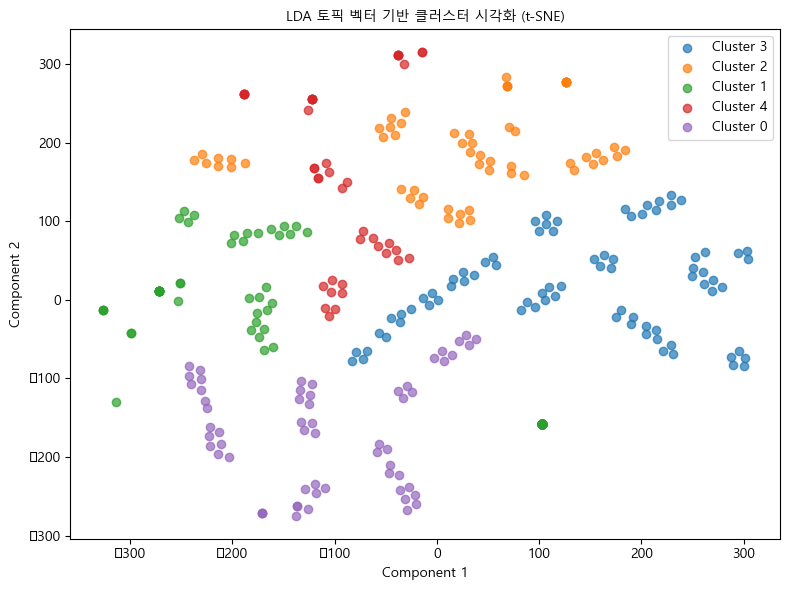

In [137]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 2. 리스트 → NumPy 배열
lda_array = np.array(lda_vectors)

# 3. t-SNE 적용
X_2d = TSNE(n_components=2, random_state=42, perplexity=5).fit_transform(lda_array)

# 4. 시각화
plt.figure(figsize=(8, 6))
for cluster_id in df_matched['topic_cluster'].unique():
    idx = df_matched['topic_cluster'] == cluster_id
    plt.scatter(X_2d[idx, 0], X_2d[idx, 1], label=f"Cluster {cluster_id}", alpha=0.7)

plt.legend(prop=font_prop)
plt.title("LDA 토픽 벡터 기반 클러스터 시각화 (t-SNE)", fontproperties=font_prop)
plt.xlabel("Component 1", fontproperties=font_prop)
plt.ylabel("Component 2", fontproperties=font_prop)
plt.tight_layout()
plt.show()


 t-SNE 시각화 해석법 (LDA 토픽 클러스터 기준)
1. 각 점(Point)은 하나의 리뷰 문장을 의미해
점 하나 = 사용자 리뷰 하나 (혹은 TF-IDF나 LDA로 벡터화한 문장)

이 점들의 상대적 거리 = 리뷰 간 의미적 유사성

2. 비슷한 의미의 문장일수록 가까이 배치됨
같은 주제를 공유하는 문장들은 같은 클러스터 안에서 밀집

다른 주제를 가진 문장과는 거리상 분리

3. 클러스터 별 영역 구분을 통해 LDA 토픽 주제 확인
예: 파란색 Cluster 3 → “배송 불만” 관련 리뷰

주황색 Cluster 1 → “환불 처리 문제” 관련 리뷰
→ 이렇게 시각적으로 명확한 주제 영역이 잘 드러나면 LDA 결과가 유의미하다고 판단 가능

4. 군집이 서로 얼마나 멀리 떨어져 있는가?
토픽 간 명확한 구분이 존재한다는 뜻

만약 클러스터가 겹치거나 흩어져 있다면 → 주제가 애매하거나 모델 정교화 필요

5. t-SNE는 거리 간 정확한 비율을 유지하지는 않음
"거리가 2배니까 2배 더 다르다"는 의미는 아님

다만, 근접한 점들은 실제로 의미가 유사한 경우가 많음

💡 해석 예시로 써먹기 좋은 문장
“t-SNE 시각화를 통해 LDA 기반 리뷰 토픽들이 주제별로 명확히 분리됨을 확인할 수 있었고, 이는 각 사용자 불만 유형이 뚜렷하게 분류될 수 있음을 시사합니다.”

또는

“배송 지연, 환불 문제, 쇼퍼 대응 등 주요 이슈가 시각적으로 군집을 이루며 분리되어, 각 주제별 요구사항이 서로 다른 고객 경험에서 비롯됨을 확인할 수 있습니다.”

In [109]:
tsne = TSNE(n_components=2, perplexity=15, n_iter=2000, random_state=42)

- 이게 kmeans 기반 

In [115]:
from collections import Counter

# 클러스터 개수 k개일 때
for i in range(k):
    print(f"\n🧩 클러스터 {i} 주요 키워드:")
    
    # 클러스터 i에 해당하는 행 필터링 → 토큰 컬럼을 펼쳐서 리스트로 만들기
    token_list = df_filtered[df_filtered['cluster'] == i]['filtered_tokens'].explode()
    
    # 가장 많이 등장한 토큰 10개 출력
    top_keywords = Counter(token_list).most_common(10)
    print(top_keywords)



🧩 클러스터 0 주요 키워드:
[('주문', 29), ('요청', 22), ('제품', 12), ('사용', 12), ('문제', 12), ('대체', 10), ('환불', 6), ('상품', 5), (nan, 1), (nan, 1)]

🧩 클러스터 1 주요 키워드:
[('환불', 6), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1)]

🧩 클러스터 2 주요 키워드:
[(nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1)]

🧩 클러스터 3 주요 키워드:
[('요청', 16), ('응답', 8)]

🧩 클러스터 4 주요 키워드:
[('응답', 18), ('주문', 18), ('물품', 9), ('문제', 9), ('환불', 6)]


-> kmeans했을때 조금 아쉬워서 보완할 수 있는걸 찾다가 LDA를 발견했어요

- 이게 LDA기반

In [116]:
for i in range(df_filtered['topic_cluster'].nunique()):
    print(f"\n🧩 토픽 {i} 주요 키워드:")
    token_list = df_filtered[df_filtered['topic_cluster'] == i]['filtered_tokens'].explode()
    top_keywords = Counter(token_list).most_common(10)
    print(top_keywords)



🧩 토픽 0 주요 키워드:
[('주문', 34), ('제품', 27), ('문제', 23), ('요청', 12), ('상품', 10)]

🧩 토픽 1 주요 키워드:
[('서비스', 35), ('사용', 27), ('문제', 12), ('환불', 4), ('상품', 4), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1)]

🧩 토픽 2 주요 키워드:
[('쇼퍼', 55), ('환불', 21), ('사용', 13), ('쇼핑', 10), ('주문', 9), ('상품', 8), ('제품', 4)]

🧩 토픽 3 주요 키워드:
[('주문', 85), ('대체', 33), ('요청', 29), ('환불', 6), ('물품', 5)]

🧩 토픽 4 주요 키워드:
[('물품', 33), ('응답', 26), ('문제', 9), ('요청', 8)]


-> 아무래도 LDA가 더 잘된거같아서 
- 그래서 기존의 KMEANS 코드를 전부 LDA로 변환시켰어요

In [142]:
# LDA 기반 topic_cluster 컬럼에 대한 라벨 매핑
topic_labels = {
    0: "📦 주문 오류 및 대체 불만\n- 주문 누락, 잘못된 대체품, 환불 미처리",
    1: "🍎 제품 문제 및 품질 불만\n- 상한 상품, 포장 불량, 품질 저하",
    2: "🛠 서비스 품질 및 사용성 문제\n- 앱 오류, 쿠폰 미적용, UI 불편",
    3: "👤 쇼퍼 응대 및 환불 문제\n- 쇼퍼 불친절, 응답 지연, 환불 지연",
    4: "📞 고객 요청 미응답\n- 요청사항 반영 안됨, 연락 두절, CS 미흡"
}


# 새로운 라벨 컬럼 추가
df_filtered['topic_label'] = df_filtered['topic_cluster'].map(topic_labels)


In [146]:
# LDA 토픽 번호에 따른 요구사항 템플릿
demand_templates_lda = {
    0: "주문 정확도 개선 및 잘못된 대체품 방지 프로세스 강화 필요",
    1: "상품 품질 관리 및 포장 상태 개선과 신속한 클레임 처리 체계 필요",
    2: "앱 기능 안정화, 할인/쿠폰 시스템 개선 및 전반적인 사용성 향상 필요",
    3: "쇼퍼 교육 표준화 및 고객 불만 대응/환불 처리 시스템 개선 필요",
    4: "고객 요청사항 실시간 반영과 대응 속도 개선을 위한 CS 시스템 필요"
}

# 데이터프레임에 라벨/요구사항 매핑
df_filtered['topic_label'] = df_filtered['topic_cluster'].map(topic_labels)
df_filtered['user_demand'] = df_filtered['topic_cluster'].map(demand_templates_lda)

# 출력 예시
for i in sorted(df_filtered['topic_cluster'].unique()):
    print(f"\n Topic {i} - {topic_labels[i]}")
    print(f" - 요구사항 요약: {demand_templates_lda[i]}")
    sample = df_filtered[df_filtered['topic_cluster'] == i]['sentences'].drop_duplicates().head(3)
    for s in sample:
        print(" -", s)




 Topic 0 - 📦 주문 오류 및 대체 불만
- 주문 누락, 잘못된 대체품, 환불 미처리
 - 요구사항 요약: 주문 정확도 개선 및 잘못된 대체품 방지 프로세스 강화 필요
 - 배송 기사에 의존하고 집으로 심각한 문제를 가져오는 것을 상상할 수 없습니다
 - 더 많은 인스타카트 팁을 요청했지만 주문하는 것이 불편했고, 제품을 선택하는 것을 선호했습니다
 - 주문이 취소되었고 제품이 없는 상태로 남아 있습니다

 Topic 1 - 🍎 제품 문제 및 품질 불만
- 상한 상품, 포장 불량, 품질 저하
 - 요구사항 요약: 상품 품질 관리 및 포장 상태 개선과 신속한 클레임 처리 체계 필요
 - 뜨거운 손으로 만진 봉지에 냉동 생선이 들어 있어서 먹을 수 없었다
 - 나는 인스타카트를 믿을 수 없다
 - 그들의 오만함과 관심 없음에 대해 희망한다

 Topic 2 - 🛠 서비스 품질 및 사용성 문제
- 앱 오류, 쿠폰 미적용, UI 불편
 - 요구사항 요약: 앱 기능 안정화, 할인/쿠폰 시스템 개선 및 전반적인 사용성 향상 필요
 - 더이상 참을 수 없어서 가게 매니저와 이야기하려고 했지만 환불에 대해 다시 속이 태우는 대답만 받아서 가방에 있는 식료품들을 그대로 두고 가게를 나왔습니다
 - 배송이 정말 최악이었고, 쇼퍼의 질이 많이 떨어진 것 같았습니다
 - 매우 불만족스러운 상황이었고, 환불 기록도 없었습니다

 Topic 3 - 👤 쇼퍼 응대 및 환불 문제
- 쇼퍼 불친절, 응답 지연, 환불 지연
 - 요구사항 요약: 쇼퍼 교육 표준화 및 고객 불만 대응/환불 처리 시스템 개선 필요
 - 스톱 앤 샵에 도움을 요청했지만 인스타카트에 연락했을 때는 답변이 없었습니다
 - 주문 번호나 이메일 주소를 언급했을 때 대신품을 원하지 않고 환불을 원했는데, 나중에 주문 내역을 기록했을 때 인스타카트 웹사이트에 아무것도 없었습니다
 - 그때 남자가 주문한 많은 물건들이 없다고 표시했고, 최악의 대체품을 골랐어요

 Topic 4 - 📞 고객 요청 미응답
- 요청사항 반

토픽별 주요 키워드 워드클라우드 만들기

C:\Users\User\AppData\Local\Temp\ipykernel_7476\1589450568.py:43: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


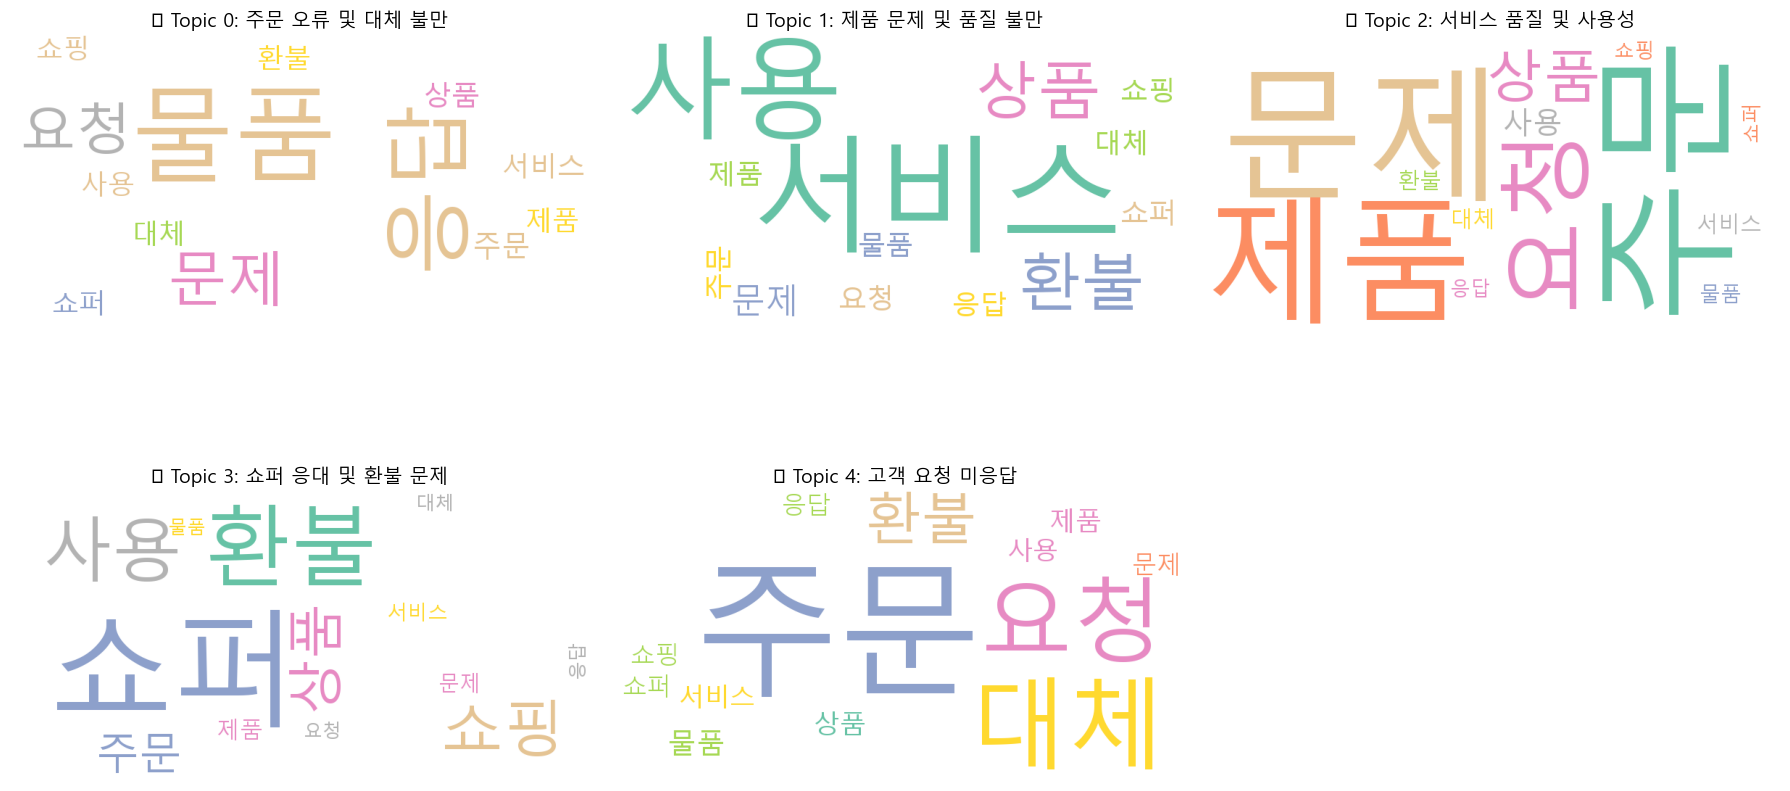

In [147]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 주제명 매핑
topic_labels = {
    0: "주문 오류 및 대체 불만",
    1: "제품 문제 및 품질 불만",
    2: "서비스 품질 및 사용성",
    3: "쇼퍼 응대 및 환불 문제",
    4: "고객 요청 미응답"
}

# 시각화 설정
n_topics = len(topic_labels)
ncols = 3
nrows = (n_topics + ncols - 1) // ncols

plt.figure(figsize=(18, 10))

for i, (topic_id, topic) in enumerate(lda.show_topics(formatted=False, num_words=20)):
    words = dict(topic)
    wc = WordCloud(font_path=font_path, background_color="white", width=800, height=400)

   
    wc = WordCloud(
        font_path=font_path,
        background_color="white",
        colormap= 'Set2',
        width=800,
        height=400
    )

    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(wc.generate_from_frequencies(words))
    plt.axis('off')
    title_text = f"🧩 Topic {topic_id}: {topic_labels.get(topic_id, 'Unknown')}"
    plt.title(title_text, fontproperties=font_prop, fontsize=14)

plt.tight_layout()
plt.show()


-> 이정도면 워드클라우드도 토픽별로 잘나오는것 같다고 판단했어요

LDA 기반 사용자 요구사항 빈도 시각화 코드

C:\Users\User\AppData\Local\Temp\ipykernel_7476\171052289.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


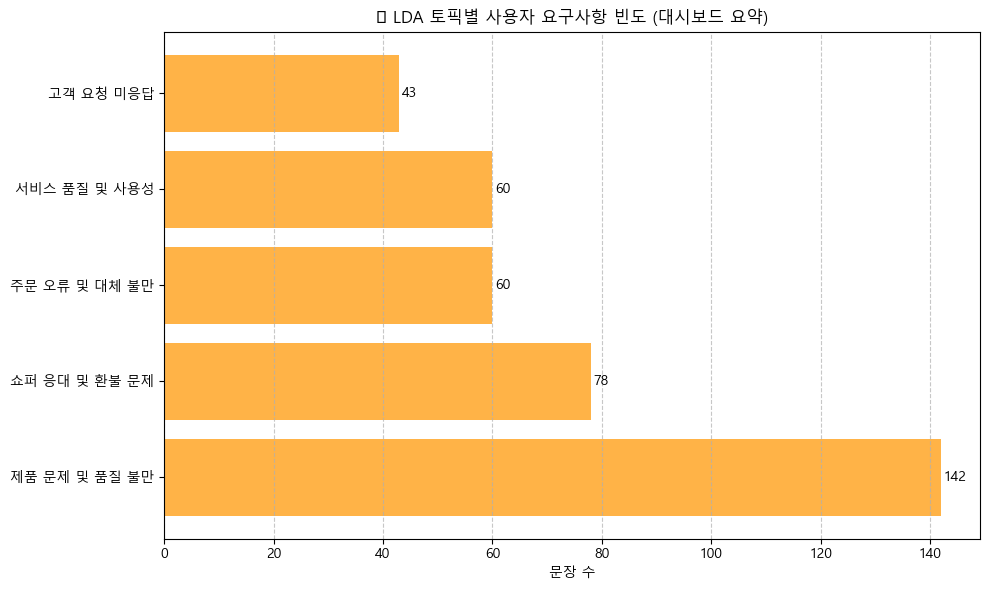

In [148]:
import matplotlib.pyplot as plt

# 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'

# ✅ LDA 기반 문장 수 요약 테이블
lda_summary = df_filtered['topic_cluster'].map(topic_labels).value_counts().reset_index()
lda_summary.columns = ['토픽 주제', '문장 수']
lda_summary = lda_summary.sort_values('문장 수')  # y축 뒤집기용

# ✅ 수평 막대그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.barh(lda_summary['토픽 주제'], lda_summary['문장 수'], color="#FFB347")
plt.xlabel("문장 수")
plt.title("📊 LDA 토픽별 사용자 요구사항 빈도 (대시보드 요약)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# ✅ 바 라벨 추가
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{int(bar.get_width())}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [149]:
print("전체 리뷰 수:", len(df_instarvw))  # 원본 전체 리뷰 수
print("LDA 사용 리뷰 수:", len(df_filtered))  # LDA에 사용한 필터된 수

전체 리뷰 수: 2968
LDA 사용 리뷰 수: 383


-> 차이가 왜 나는지 궁금해서 확인해보니까 
LDA로 필터링할때 
1. 공백 리뷰 제거 (0개)
2. 짧은 리뷰 제거 
3. 의미 없는 토큰만 남은 리뷰 제거
4. 오류 리뷰 제거 (인코딩실패같은)
5. 특정 기준 키워드 없는 리뷰 제거하다보니 383개로 줄여진거같아요,,,

LDA 기반 클러스터별 키워드 빈도 분석 코드

- topic_labels 
    - 0: "📦 주문 오류 및 대체 불만\n- 주문 누락, 잘못된 대체품, 환불 미처리",
    - 1: "🍎 제품 문제 및 품질 불만\n- 상한 상품, 포장 불량, 품질 저하",
    - 2: "🛠 서비스 품질 및 사용성 문제\n- 앱 오류, 쿠폰 미적용, UI 불편",
    - 3: "👤 쇼퍼 응대 및 환불 문제\n- 쇼퍼 불친절, 응답 지연, 환불 지연",
    - 4: "📞 고객 요청 미응답\n- 요청사항 반영 안됨, 연락 두절, CS 미흡"


In [151]:
from collections import Counter
import pandas as pd
from collections import defaultdict

# 👉 사전 작업: LDA 기준으로 키워드 수집
lda_keywords = defaultdict(list)

for _, row in df_filtered.iterrows():
    lda_keywords[row['topic_cluster']].extend(row['filtered_tokens'])

# 클러스터별 핵심 키워드 TOP 5 추출
top_keywords_per_topic = []

for topic_id, tokens in lda_keywords.items():
    counter = Counter(tokens)
    top_keywords = counter.most_common(5)
    for keyword, count in top_keywords:
        top_keywords_per_topic.append({
            '토픽': topic_id,
            '키워드': keyword,
            '등장 횟수': count
        })

# ✅ 최종 데이터프레임 생성
df_top_keywords_lda = pd.DataFrame(top_keywords_per_topic)
df_top_keywords_lda


,토픽,키워드,등장 횟수
0,3,주문,85
1,3,대체,33
2,3,요청,29
3,3,환불,6
4,3,물품,5
5,2,쇼퍼,55
6,2,환불,21
7,2,사용,13
8,2,쇼핑,10
9,2,주문,9


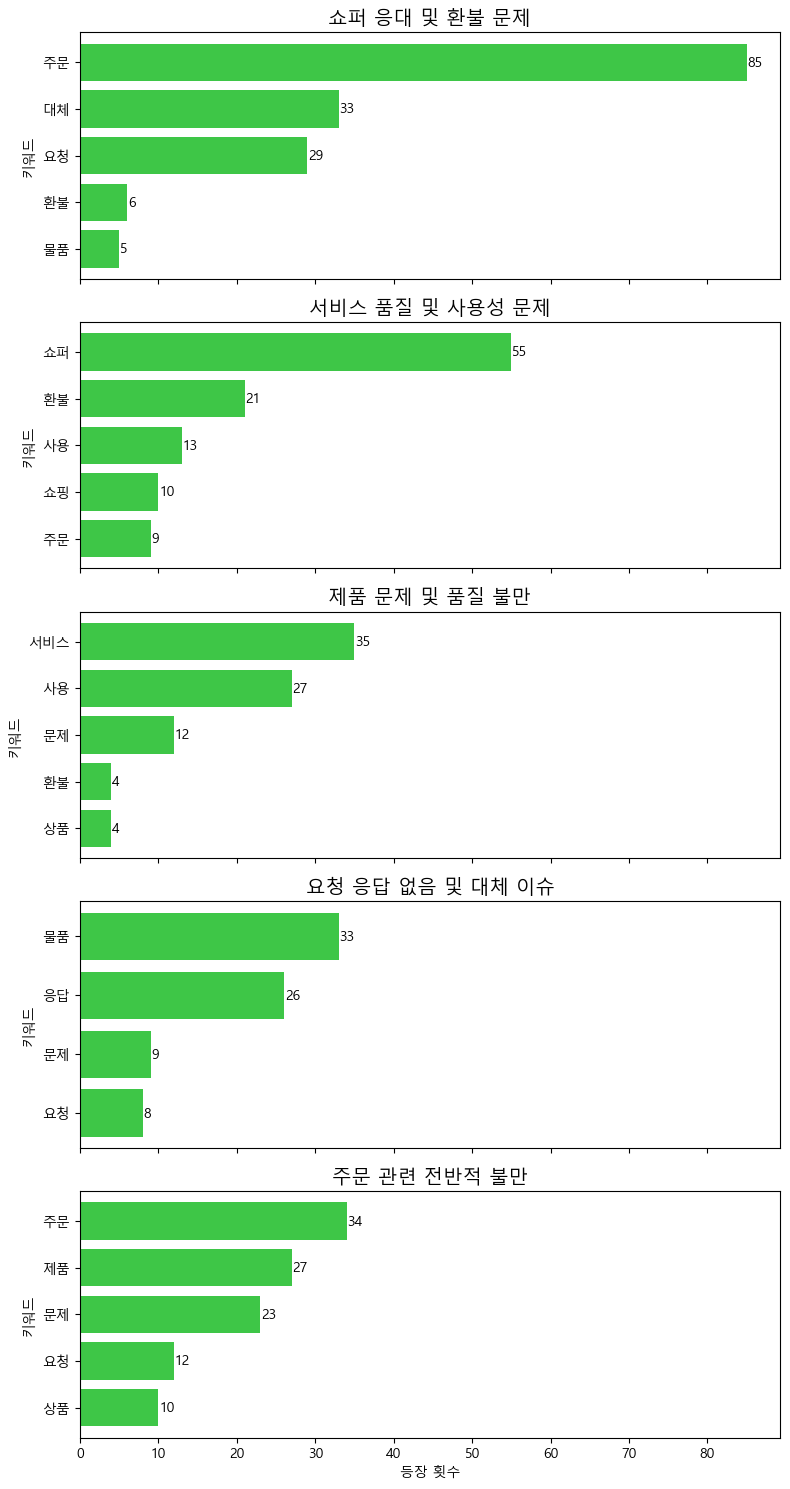

In [152]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows용)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 📌 데이터프레임: LDA 기반 키워드 데이터
clusters = df_top_keywords_lda['토픽'].unique()
num_clusters = len(clusters)

fig, axes = plt.subplots(num_clusters, 1, figsize=(8, 3 * num_clusters), sharex=True)

# subplot이 하나인 경우도 리스트 처리
if num_clusters == 1:
    axes = [axes]

# 각 subplot 그리기
for i, topic_id in enumerate(clusters):
    data = df_top_keywords_lda[df_top_keywords_lda['토픽'] == topic_id]
    bars = axes[i].barh(data['키워드'], data['등장 횟수'], color="#3EC647")
    
    # 제목을 매핑된 토픽명으로 지정
    axes[i].set_title(f"{topic_names.get(topic_id, f'Topic {topic_id}')}", fontproperties=font_prop, fontsize=14)
    axes[i].set_ylabel("키워드", fontproperties=font_prop)
    axes[i].invert_yaxis()

    # 숫자 레이블 추가
    for bar in bars:
        width = bar.get_width()
        axes[i].text(width + 0.1, bar.get_y() + bar.get_height() / 2,
                     f"{int(width)}", va='center', fontsize=10, color='black')

# 마지막 x축 레이블만 추가
axes[-1].set_xlabel("등장 횟수", fontproperties=font_prop)

plt.tight_layout()
plt.show()


리뷰 별점에 큰 영향을 주는 핵심 요인들(예: 환불, 응대, 쇼퍼 태도, 대체품 문제 등)

In [153]:
# 영향 요인 정의 (핵심 변수 정의)
impact_factors = {
    "쇼퍼 태도": ["shopper", "쇼퍼", "불친절", "느림", "대응", "경험"],
    "환불 문제": ["환불", "취소", "불가", "지연", "기록 없음"],
    "응대 부족": ["응대", "답변", "연락 없음", "고객센터", "응답"],
    "대체품 문제": ["대체", "대신", "선택", "최악", "맘에 안듦"],
    "상품 상태": ["상하다", "썩다", "찌그러짐", "파손", "깨짐", "문제", "냄새"]
}


LDA 토픽별 영향 요인 문장 추출 코드

In [154]:
from collections import defaultdict

lda_issue_sentences = defaultdict(lambda: defaultdict(set))  # ✅ set으로 중복 제거

for _, row in df_filtered.iterrows():
    topic_id = row['topic_cluster']
    sentence = row['sentences']
    for factor, keywords in impact_factors.items():
        if any(kw in sentence for kw in keywords):
            lda_issue_sentences[topic_id][factor].add(sentence)  # ✅ 중복 방지


각 토픽별 요인별 대표 문장

In [163]:
import pandas as pd

# 데이터를 표로 변환할 리스트
rows = []

# 토픽-요인별 대표 문장 추출
for topic_id, factor_dict in lda_issue_sentences.items():
    for factor, sents in factor_dict.items():
        for s in list(sents)[:3]:  # 대표 문장 최대 3개까지
            rows.append({
                "토픽 번호": topic_id,
                "주요 영향 요인": factor,
                "대표 문장": s
            })

# DataFrame으로 변환
df_lda_factors = pd.DataFrame(rows)

# 보기 쉽게 정렬 (선택사항)
df_lda_factors = df_lda_factors.sort_values(by=["토픽 번호", "주요 영향 요인"])
df_lda_factors.head(3)

,토픽 번호,주요 영향 요인,대표 문장
21,0,대체품 문제,"더 많은 인스타카트 팁을 요청했지만 주문하는 것이 불편했고, 제품을 선택하는 것을 ..."
19,0,상품 상태,"직원들과 관련된 부정적인 문제들을 자세히 언급한 리뷰였는데, 과거에 주문한 식료품이..."
20,0,상품 상태,배송 기사에 의존하고 집으로 심각한 문제를 가져오는 것을 상상할 수 없습니다


- 주제 잡고 다시 해볼게

| 대분류      | 세부 유형 (불만 유형 확장 예시)      |
| -------- | ------------------------ |
| 주문 문제    | 주문 실패 / 누락 / 지연 / 잘못된 제품 |
| 배송 문제    | 배송 지연 / 배송 중 파손 / 쇼퍼 실수  |
| 대체품 문제   | 고객 동의 없이 대체 / 품질 낮은 대체품  |
| 환불·CS 문제 | 환불 지연 / 응답 없음 / 고객 응대 문제 |
| 상품 품질 문제 | 상함 / 찢어짐 / 유통기한 문제       |
| 쿠폰·결제    | 쿠폰 미적용 / 결제 오류           |


-> 이렇게 확장시키기

In [ ]:
from konlpy.tag import Okt
okt = Okt()

def clean_and_tokenize(text):
    # 예시: 명사 추출 + 불용어 제거
    stopwords = ['정말', '진짜', '너무', '거의', '그냥', '좀', '것', '거', '에서', '으로', '하게', '해서']
    tokens = okt.nouns(text)
    tokens = [word for word in tokens if word not in stopwords and len(word) > 1]
    return tokens

# 적용
df['filtered_tokens'] = df['리뷰(번역)'].apply(clean_and_tokenize)
from konlpy.tag import Okt
okt = Okt()
def tokenize(text):
    return [w for w, pos in okt.pos(text) if pos in ['Noun', 'Adjective']]


In [ ]:
df_filtered = df[df['filtered_tokens'].apply(lambda x: len(x) > 2)].copy()

In [172]:
print("전체 리뷰 수:", len(df))
print("전처리 후 리뷰 수:", len(df_filtered))
print("필터링 비율:", 100 - len(df_filtered)/len(df)*100, "%")


전체 리뷰 수: 2100
전처리 후 리뷰 수: 2100
필터링 비율: 0.0 %


In [175]:
print(df_filtered.columns)

Index(['rating', 'review', '리뷰(번역)', 'filtered_tokens'], dtype='object')


In [177]:
df_filtered = df_filtered.iloc[:len(lda_vectors)].copy()
df_filtered['topic_cluster'] = np.argmax(lda_vectors, axis=1)

In [179]:
len(lda_vectors)

383

In [181]:
from konlpy.tag import Okt

okt = Okt()

def tokenize(text):
    return okt.nouns(text)  # 명사만 추출하거나 okt.morphs(text) 도 가능

df['filtered_tokens'] = df['리뷰(번역)'].fillna('').apply(tokenize)


In [196]:
#  KoNLPy의 Okt 형태소 분석기를 활용하여 문장(sentences)을 
# 형태소 분석 + 불용어 제거 + 주요 품사 필터링하는 전처리 과정
from konlpy.tag import Okt

okt = Okt()

# 불용어 예시
stopwords = ['정말', '진짜', '너무', '거의', '그냥','입니다', '있는', '하고', '해서', '하면', '정도'
             , '좀', '것', '거', '에서', '하다','이다' ,'더','있다','으로', '하게']

# 토큰화 및 불용어 제거
def clean_and_tokenize(text):
    tokens = okt.pos(text, stem=True)  # 품사 정보 포함
    cleaned = [word for word, tag in tokens 
               if tag in ['Noun', 'Verb', 'Adjective'] and word not in stopwords]
    return cleaned

df_instarvw['tokens'] = df_instarvw['sentences'].apply(clean_and_tokenize)

In [197]:
from collections import Counter

# 모든 불만 문장 토큰 합치기
all_tokens = df_negative['tokens'].explode()
token_counts = Counter(all_tokens)

# 상위 키워드 확인
token_counts.most_common(30)

[('하다', 433),
 ('없다', 378),
 ('수', 132),
 ('주문', 128),
 ('인스타', 99),
 ('카트', 99),
 ('있다', 88),
 ('배송', 55),
 ('쇼퍼', 55),
 ('더', 51),
 ('받다', 50),
 ('요청', 49),
 ('번', 47),
 ('선택', 46),
 ('때', 45),
 ('문제', 44),
 ('두', 42),
 ('되어다', 41),
 ('이다', 40),
 ('사용', 40),
 ('이상', 39),
 ('식료품', 39),
 ('물품', 38),
 ('들다', 36),
 ('서비스', 35),
 ('팁', 34),
 ('대한', 33),
 ('대체', 33),
 ('품', 33),
 ('환불', 31)]

In [199]:
# 분석에 쓸 키워드만 필터링
meaningful_keywords =  {
    "상품 상태": [
        "상하다", "썩다", "찌그러짐", "파손", "깨짐", "불량", "냄새", "상태", "신선", "포장", "문제", "변질", "누락"
    ],
    "대체품 문제": [
        "대체", "대신", "잘못된", "다른", "원하지", "선택", "엉뚱한", "최악", "맘에 안듦", "마음에 들지 않음"
    ],
    "환불 문제": [
        "환불", "지연", "취소", "불가", "기록 없음", "못 받음", "안 됨", "누락", "환불 안됨", "환불되지 않음"
    ],
    "쇼퍼 태도": [
        "쇼퍼", "shopper", "불친절", "느림", "대응", "태도", "무시", "연락", "경험", "대화", "무반응"
    ],
    "응대 부족": [
        "응대", "답변", "연락 없음", "고객센터", "응답 없음", "연결 안됨", "응답", "연락두절"
    ],
    "서비스 전반": [
        "늦다", "느림", "연결", "응답 없음", "불편", "문제", "버그", "이용 불편", "접속 오류", "로그인 문제"
    ]
}

# 2. 일반 의미 있는 키워드
general_keywords = [
    "주문", "환불", "쇼퍼", "상품", "서비스", "요청", "응답", 
    "대체", "물품", "제품", "문제", "사용", "쇼핑"
]

# 1. impact factor 키워드만 추출
impact_keywords = set()
for keyword_list in meaningful_keywords.values():
    impact_keywords.update(keyword_list)

# 2. 일반 키워드와 합치기
all_meaningful_keywords = impact_keywords.union(general_keywords)

# 3. 필터링 적용
df_filtered = df_negative.copy()
df_filtered['filtered_tokens'] = df_filtered['tokens'].apply(
    lambda tokens: [t for t in tokens if t in all_meaningful_keywords]
)

In [ ]:

# 키워드가 포함된 문장만 추출
df_filtered['matched_keywords'] = df_filtered['filtered_tokens'].apply(lambda x: ', '.join(x))

# 키워드별로 어떤 문장이 있었는지 보기
for keyword in meaningful_keywords:
    print(f"\n🔍 {keyword.upper()} 관련 문장들")
    subset = df_filtered[df_filtered['filtered_tokens'].apply(lambda tokens: keyword in tokens)]
    for s in subset['sentences'].head(5):  # 상위 5개씩 예시 출력
        print("-", s)

In [ ]:
# 1. 키워드가 포함된 문장 필드 생성
df_filtered['matched_keywords'] = df_filtered['filtered_tokens'].apply(lambda x: ', '.join(x))

# 2. 카테고리별로 관련 문장 출력
for category, keywords in meaningful_keywords.items():
    print(f"\n📌 [{category}] 관련 문장 예시")
    
    # 각 키워드별로 문장 출력
    for keyword in keywords:
        subset = df_filtered[df_filtered['filtered_tokens'].apply(lambda tokens: keyword in tokens)]
    
        if not subset.empty:
            print(f"\n🔍 키워드: '{keyword}'")
            for s in subset['sentences'].head(5):
                print("-", s)
# 중복해서 나옴 


📌 [상품 상태] 관련 문장 예시

🔍 키워드: '상태'
- 다른 쇼퍼가 두 번 신선한 블루베리를 주문했을 때, 두 번 모양이 나쁜 상태로 도착했고 쇼퍼 노트에는 완전히 익은 과일을 선택하라는 표시가 무시되었습니다
- 다른 쇼퍼가 두 번 신선한 블루베리를 주문했을 때, 두 번 모양이 나쁜 상태로 도착했고 쇼퍼 노트에는 완전히 익은 과일을 선택하라는 표시가 무시되었습니다
- 다른 쇼퍼가 두 번 신선한 블루베리를 주문했을 때, 두 번 모양이 나쁜 상태로 도착했고 쇼퍼 노트에는 완전히 익은 과일을 선택하라는 표시가 무시되었습니다
- 다른 쇼퍼가 두 번 신선한 블루베리를 주문했을 때, 두 번 모양이 나쁜 상태로 도착했고 쇼퍼 노트에는 완전히 익은 과일을 선택하라는 표시가 무시되었습니다
- 다른 쇼퍼가 두 번 신선한 블루베리를 주문했을 때, 두 번 모양이 나쁜 상태로 도착했고 쇼퍼 노트에는 완전히 익은 과일을 선택하라는 표시가 무시되었습니다

🔍 키워드: '문제'
- 배송 기사에 의존하고 집으로 심각한 문제를 가져오는 것을 상상할 수 없습니다
- 배송 기사에 의존하고 집으로 심각한 문제를 가져오는 것을 상상할 수 없습니다
- 배송 기사에 의존하고 집으로 심각한 문제를 가져오는 것을 상상할 수 없습니다
- 배송 기사에 의존하고 집으로 심각한 문제를 가져오는 것을 상상할 수 없습니다
- 배송 기사에 의존하고 집으로 심각한 문제를 가져오는 것을 상상할 수 없습니다

📌 [대체품 문제] 관련 문장 예시

🔍 키워드: '대체'
- 그때 남자가 주문한 많은 물건들이 없다고 표시했고, 최악의 대체품을 골랐어요
- 그때 남자가 주문한 많은 물건들이 없다고 표시했고, 최악의 대체품을 골랐어요
- 그때 남자가 주문한 많은 물건들이 없다고 표시했고, 최악의 대체품을 골랐어요
- 그때 남자가 주문한 많은 물건들이 없다고 표시했고, 최악의 대체품을 골랐어요
- 그때 남자가 주문한 많은 물건들이 없다고 표시했고, 최악의 대체품을 골랐어요

🔍 키워드: '대신'
- 서비스는 괜찮았지만 환불된 

In [204]:
# 1. LDA 결과 컬럼: 'topic_cluster'와 'sentences'는 이미 있을 거예요

# 2. 수작업 분류: impact_factors 기반 분류 추가
def assign_primary_category(tokens):
    for category, keywords in meaningful_keywords.items():
        if any(k in tokens for k in keywords):
            return category
    return "기타"

df_filtered['primary_category'] = df_filtered['filtered_tokens'].apply(assign_primary_category)


In [208]:
from gensim import corpora, models

# 1. 토큰 리스트
texts = df_filtered['filtered_tokens'].tolist()

# 2. 단어 사전 생성
dictionary = corpora.Dictionary(texts)

# 3. 문서-단어 행렬 (BoW)
corpus = [dictionary.doc2bow(text) for text in texts]

# 4. LDA 모델 훈련
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)

# 5. 문장별 토픽 할당
def get_topic_id(doc_bow):
    topics = lda_model.get_document_topics(doc_bow)
    return sorted(topics, key=lambda x: -x[1])[0][0] if topics else -1

df_filtered['topic_cluster'] = [get_topic_id(doc) for doc in corpus]

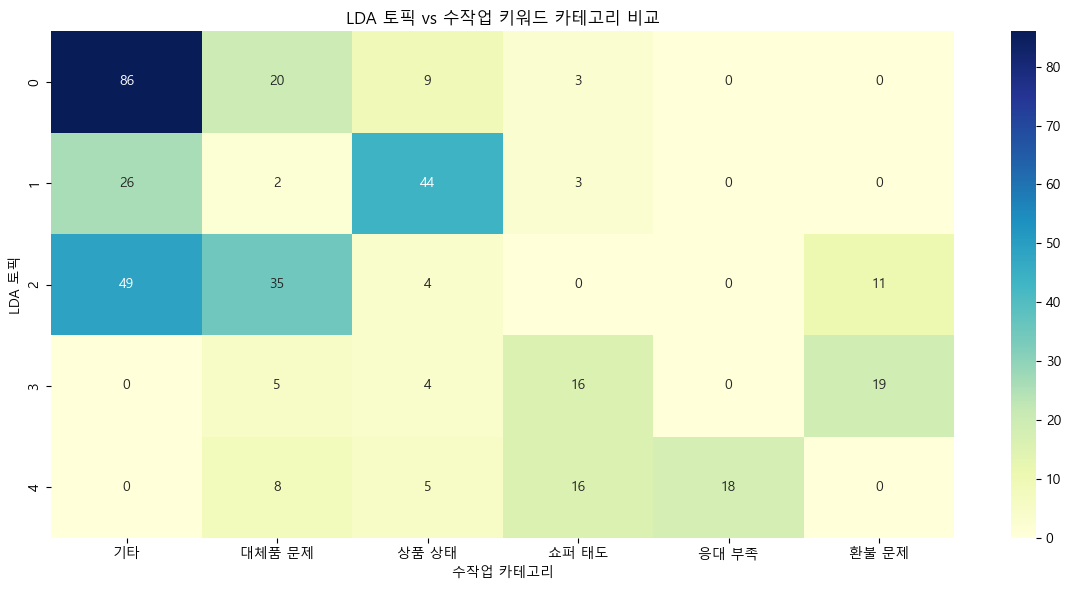

In [209]:
# 교차표
comparison_table = pd.crosstab(df_filtered['topic_cluster'], df_filtered['primary_category'])

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(comparison_table, annot=True, fmt='d', cmap="YlGnBu")
plt.title("LDA 토픽 vs 수작업 키워드 카테고리 비교")
plt.xlabel("수작업 카테고리")
plt.ylabel("LDA 토픽")
plt.tight_layout()
plt.show()


- LDA 키워드 확인

In [212]:
# LDA 토픽 대표 키워드 출력
for i, topic in lda_model.show_topics(num_topics=5, num_words=10, formatted=False):
    keywords = ", ".join([word for word, _ in topic])
    print(f"🧠 Topic {i}: {keywords}")


🧠 Topic 0: 쇼퍼, 선택, 주문, 최악, 문제, 사용, 응답, 상태, 물품, 취소
🧠 Topic 1: 주문, 문제, 서비스, 선택, 사용, 쇼퍼, 요청, 물품, 상태, 다른
🧠 Topic 2: 주문, 요청, 제품, 대체, 물품, 선택, 상품, 환불, 상태, 최악
🧠 Topic 3: 환불, 요청, 서비스, 대체, 답변, 연락, 사용, 선택, 쇼퍼, 주문
🧠 Topic 4: 쇼퍼, 물품, 사용, 응답, 상품, 상태, 제품, 쇼핑, 요청, 대체


토픽이랑 해석 매칭시키기

In [215]:
# 1. 토픽 번호에 따른 해석된 라벨 정의
topic_label_map = {
    0: "환불 처리 지연 및 고객 응대 문제",
    1: "원치 않는 대체상품 문제",
    2: "상품 파손 및 신선도 불만",
    3: "쇼퍼의 태도 및 커뮤니케이션 문제",
    4: "앱/서비스 오류 및 사용성 문제"
}

# 2. 매핑하여 새로운 컬럼 추가
df_filtered['topic_label'] = df_filtered['topic_cluster'].map(topic_label_map)


In [222]:
# 중복 문장 제거용 집합
seen_sentences = set()

# 토픽별 문장 출력
for topic_id in sorted(df_filtered['topic_cluster'].unique()):
    # 해당 토픽의 라벨 가져오기
    topic_name = df_filtered[df_filtered['topic_cluster'] == topic_id]['topic_label'].iloc[0]

    print(f"\n📌 [Topic {topic_id}] {topic_name} ")

    # 중복 제거된 문장만 추출
    topic_sentences = df_filtered[df_filtered['topic_cluster'] == topic_id]['sentences'].drop_duplicates()

    count = 0
    for sent in topic_sentences:
        if sent not in seen_sentences:
            print("-", sent)
            seen_sentences.add(sent)
            count += 1
        if count >= 3:
            break



📌 [Topic 0] 환불 처리 지연 및 고객 응대 문제 
- 배송이 정말 최악이었고, 쇼퍼의 질이 많이 떨어진 것 같았습니다
- 뜨거운 손으로 만진 봉지에 냉동 생선이 들어 있어서 먹을 수 없었다
- 나는 인스타카트를 믿을 수 없다

📌 [Topic 1] 원치 않는 대체상품 문제 
- 불편함에 대한 5달러 크레딧을 제공했지만, 이 서비스를 더 이상 이용하지 않을 것입니다
- 배송 기사에 의존하고 집으로 심각한 문제를 가져오는 것을 상상할 수 없습니다
- 아프다는 이유로 두 번째로 인스타카트 옵션을 사용한 적이 있었는데, 식료품 앱 시간에 문제가 없었어요

📌 [Topic 2] 상품 파손 및 신선도 불만 
- 주문 번호나 이메일 주소를 언급했을 때 대신품을 원하지 않고 환불을 원했는데, 나중에 주문 내역을 기록했을 때 인스타카트 웹사이트에 아무것도 없었습니다
- 더 많은 인스타카트 팁을 요청했지만 주문하는 것이 불편했고, 제품을 선택하는 것을 선호했습니다
- 그때 남자가 주문한 많은 물건들이 없다고 표시했고, 최악의 대체품을 골랐어요

📌 [Topic 3] 쇼퍼의 태도 및 커뮤니케이션 문제 
- 스톱 앤 샵에 도움을 요청했지만 인스타카트에 연락했을 때는 답변이 없었습니다
- 더이상 참을 수 없어서 가게 매니저와 이야기하려고 했지만 환불에 대해 다시 속이 태우는 대답만 받아서 가방에 있는 식료품들을 그대로 두고 가게를 나왔습니다
- 매우 불만족스러운 상황이었고, 환불 기록도 없었습니다

📌 [Topic 4] 앱/서비스 오류 및 사용성 문제 
- 76kg만 받았고 불만에 대한 응답이 없었습니다
- 17kg만 받았고 불만에 대한 응답이 없었습니다
- 쇼퍼가 쇼핑을 하러 갔을 때 상품이 없어서 엄청 화가 났어요


-> 라벨링 매칭 시켰는데 잘 매칭 됐는지 확인하고 자동매칭으로 하면 얼마나 정확한지 비교하는거

In [218]:
for i, topic in lda_model.show_topics(num_topics=5, num_words=10, formatted=False):
    keywords = ", ".join([word for word, _ in topic])
    print(f"🧠 Topic {i}: {keywords}")


🧠 Topic 0: 쇼퍼, 선택, 주문, 최악, 문제, 사용, 응답, 상태, 물품, 취소
🧠 Topic 1: 주문, 문제, 서비스, 선택, 사용, 쇼퍼, 요청, 물품, 상태, 다른
🧠 Topic 2: 주문, 요청, 제품, 대체, 물품, 선택, 상품, 환불, 상태, 최악
🧠 Topic 3: 환불, 요청, 서비스, 대체, 답변, 연락, 사용, 선택, 쇼퍼, 주문
🧠 Topic 4: 쇼퍼, 물품, 사용, 응답, 상품, 상태, 제품, 쇼핑, 요청, 대체


In [220]:
# topic 키워드가 어떤 카테고리 키워드랑 가장 많이 겹치는지 자동 매핑
def guess_label_from_keywords(topic_keywords, impact_dict):
    scores = {}
    for label, keywords in impact_dict.items():
        # 얼마나 많이 겹치는지 스코어 계산
        score = sum(1 for word in topic_keywords if word in keywords)
        scores[label] = score

    # 가장 많이 겹친 라벨 반환 (없으면 '기타')
    best_label = max(scores, key=scores.get)
    return best_label if scores[best_label] > 0 else "기타"



In [221]:
# 토픽 번호 -> 대표 키워드 추출
lda_topic_labels = {}

for topic_id, topic in lda_model.show_topics(num_topics=5, num_words=10, formatted=False):
    topic_keywords = [word for word, _ in topic]
    label = guess_label_from_keywords(topic_keywords, impact_factors)
    lda_topic_labels[topic_id] = label
    print(f"🧠 Topic {topic_id}: {', '.join(topic_keywords)} → 📌 {label}")


🧠 Topic 0: 쇼퍼, 선택, 주문, 최악, 문제, 사용, 응답, 상태, 물품, 취소 → 📌 상품 상태
🧠 Topic 1: 주문, 문제, 서비스, 선택, 사용, 쇼퍼, 요청, 물품, 상태, 다른 → 📌 상품 상태
🧠 Topic 2: 주문, 요청, 제품, 대체, 물품, 선택, 상품, 환불, 상태, 최악 → 📌 대체품 문제
🧠 Topic 3: 환불, 요청, 서비스, 대체, 답변, 연락, 사용, 선택, 쇼퍼, 주문 → 📌 대체품 문제
🧠 Topic 4: 쇼퍼, 물품, 사용, 응답, 상품, 상태, 제품, 쇼핑, 요청, 대체 → 📌 상품 상태


-> 이건 자동 매칭 한건데 자동매칭한건 잘안되어 보여서 수작업한걸로 다시 쓸거임

In [223]:
df_filtered['topic_cluster'].value_counts().sort_index()

topic_cluster
0    118
1     75
2     99
3     44
4     47
Name: count, dtype: int64

In [224]:
df_filtered.groupby('topic_cluster')['rating'].mean()

topic_cluster
0    1.093220
1    1.000000
2    1.282828
3    1.111111
4    1.000000
Name: rating, dtype: float64

- 요약

In [226]:
# 1. LDA 키워드 추출
topic_keywords_dict = {
    i: ", ".join([w for w, _ in topic])
    for i, topic in lda_model.show_topics(num_topics=5, num_words=10, formatted=False)
}

# 2. 대표 문장 정리 (중복 제거)
summary_data = []

seen_sentences = set()
for topic_id in sorted(df_filtered['topic_cluster'].unique()):
    label = topic_label_map[topic_id]
    keywords = topic_keywords_dict.get(topic_id, "")
    
    topic_sentences = df_filtered[df_filtered['topic_cluster'] == topic_id]['sentences'].drop_duplicates()
    
    topic_examples = []
    for s in topic_sentences:
        if s not in seen_sentences:
            topic_examples.append(s)
            seen_sentences.add(s)
        if len(topic_examples) == 3:
            break
    
    summary_data.append({
        "토픽 번호": f"Topic {topic_id}",
        "불만 유형": label,
        "대표 키워드": keywords,
        "대표 문장": "\n".join(f"{i+1}. {s}" for i, s in enumerate(topic_examples))
    })

import pandas as pd
df_summary = pd.DataFrame(summary_data)


In [227]:
df_summary


,토픽 번호,불만 유형,대표 키워드,대표 문장
0,Topic 0,환불 처리 지연 및 고객 응대 문제,"쇼퍼, 선택, 주문, 최악, 문제, 사용, 응답, 상태, 물품, 취소","1. 배송이 정말 최악이었고, 쇼퍼의 질이 많이 떨어진 것 같았습니다\n2. 뜨거운..."
1,Topic 1,원치 않는 대체상품 문제,"주문, 문제, 서비스, 선택, 사용, 쇼퍼, 요청, 물품, 상태, 다른","1. 불편함에 대한 5달러 크레딧을 제공했지만, 이 서비스를 더 이상 이용하지 않을..."
2,Topic 2,상품 파손 및 신선도 불만,"주문, 요청, 제품, 대체, 물품, 선택, 상품, 환불, 상태, 최악","1. 주문 번호나 이메일 주소를 언급했을 때 대신품을 원하지 않고 환불을 원했는데,..."
3,Topic 3,쇼퍼의 태도 및 커뮤니케이션 문제,"환불, 요청, 서비스, 대체, 답변, 연락, 사용, 선택, 쇼퍼, 주문",1. 스톱 앤 샵에 도움을 요청했지만 인스타카트에 연락했을 때는 답변이 없었습니다\...
4,Topic 4,앱/서비스 오류 및 사용성 문제,"쇼퍼, 물품, 사용, 응답, 상품, 상태, 제품, 쇼핑, 요청, 대체",1. 76kg만 받았고 불만에 대한 응답이 없었습니다\n2. 17kg만 받았고 불만...


In [228]:
for row in summary_data:
    print(f"\n🧠 {row['토픽 번호']} - {row['불만 유형']}")
    print(f"📌 주요 키워드: {row['대표 키워드']}")
    print("📝 대표 문장:\n" + row['대표 문장'])


🧠 Topic 0 - 환불 처리 지연 및 고객 응대 문제
📌 주요 키워드: 쇼퍼, 선택, 주문, 최악, 문제, 사용, 응답, 상태, 물품, 취소
📝 대표 문장:
1. 배송이 정말 최악이었고, 쇼퍼의 질이 많이 떨어진 것 같았습니다
2. 뜨거운 손으로 만진 봉지에 냉동 생선이 들어 있어서 먹을 수 없었다
3. 나는 인스타카트를 믿을 수 없다

🧠 Topic 1 - 원치 않는 대체상품 문제
📌 주요 키워드: 주문, 문제, 서비스, 선택, 사용, 쇼퍼, 요청, 물품, 상태, 다른
📝 대표 문장:
1. 불편함에 대한 5달러 크레딧을 제공했지만, 이 서비스를 더 이상 이용하지 않을 것입니다
2. 배송 기사에 의존하고 집으로 심각한 문제를 가져오는 것을 상상할 수 없습니다
3. 아프다는 이유로 두 번째로 인스타카트 옵션을 사용한 적이 있었는데, 식료품 앱 시간에 문제가 없었어요

🧠 Topic 2 - 상품 파손 및 신선도 불만
📌 주요 키워드: 주문, 요청, 제품, 대체, 물품, 선택, 상품, 환불, 상태, 최악
📝 대표 문장:
1. 주문 번호나 이메일 주소를 언급했을 때 대신품을 원하지 않고 환불을 원했는데, 나중에 주문 내역을 기록했을 때 인스타카트 웹사이트에 아무것도 없었습니다
2. 더 많은 인스타카트 팁을 요청했지만 주문하는 것이 불편했고, 제품을 선택하는 것을 선호했습니다
3. 그때 남자가 주문한 많은 물건들이 없다고 표시했고, 최악의 대체품을 골랐어요

🧠 Topic 3 - 쇼퍼의 태도 및 커뮤니케이션 문제
📌 주요 키워드: 환불, 요청, 서비스, 대체, 답변, 연락, 사용, 선택, 쇼퍼, 주문
📝 대표 문장:
1. 스톱 앤 샵에 도움을 요청했지만 인스타카트에 연락했을 때는 답변이 없었습니다
2. 더이상 참을 수 없어서 가게 매니저와 이야기하려고 했지만 환불에 대해 다시 속이 태우는 대답만 받아서 가방에 있는 식료품들을 그대로 두고 가게를 나왔습니다
3. 매우 불만족스러운 상황이었고, 환불 기록도 없었습니다

🧠 Topic 4 - 앱/서비스 오류 및 사용성 